In [ ]:
!pip install rouge
!pip install SentencePiece
!pip install rouge-score

In [ ]:
import pandas as pd
from nltk.translate.bleu_score import corpus_bleu
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

test_data = pd.read_csv('test - Trang tính1 (1).csv')

def calculate_rouge_scores(model_predictions):
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': [], 'rougeLsum': []}
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'], use_stemmer=True)

    for idx, row in test_data.iterrows():
        reference_summary = row['Summary']
        predicted_summary = model_predictions[idx]

        scores = scorer.score(reference_summary, predicted_summary)
        rouge_scores['rouge1'].append(scores['rouge1'].fmeasure)
        rouge_scores['rouge2'].append(scores['rouge2'].fmeasure)
        rouge_scores['rougeL'].append(scores['rougeL'].fmeasure)
        rouge_scores['rougeLsum'].append(scores['rougeLsum'].fmeasure)

    return rouge_scores

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("toanduc/vit5-base-vietnews-summarization-sport")
model = AutoModelForSeq2SeqLM.from_pretrained("toanduc/vit5-base-vietnews-summarization-sport")


tokenizer2 = AutoTokenizer.from_pretrained("toanduc/bartpho-syllable-sport")
model2 = AutoModelForSeq2SeqLM.from_pretrained("toanduc/bartpho-syllable-sport")

tokenizer3 = AutoTokenizer.from_pretrained("toanduc/mt5-small-sport")
model3 = AutoModelForSeq2SeqLM.from_pretrained("toanduc/mt5-small-sport")

In [ ]:
def generate_summaries(model, tokenizer, test_data):
    summaries = []
    for idx, row in test_data.iterrows():
        input_text = "summarize: " + row['Original text']
        inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=1024, truncation=True)
        outputs = model.generate(inputs, max_length=512, length_penalty=1.0, num_beams=5, early_stopping=True)
        summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
        summaries.append(summary)
        print("đã xong")
    return summaries

In [ ]:
def plot_rouge_scores(rouge_scores, model_name):
    plt.plot(range(1, len(rouge_scores['rouge1']) + 1), rouge_scores['rouge1'], label='Rouge1')
    plt.plot(range(1, len(rouge_scores['rouge2']) + 1), rouge_scores['rouge2'], label='Rouge2')
    plt.plot(range(1, len(rouge_scores['rougeL']) + 1), rouge_scores['rougeL'], label='RougeL')
    plt.plot(range(1, len(rouge_scores['rougeLsum']) + 1), rouge_scores['rougeLsum'], label='RougeLsum')

    plt.xlabel('Article Index')
    plt.ylabel('Rouge Score')
    plt.title(f'Rouge Scores for {model_name}')
    plt.legend()
    plt.show()

model_predictions_vit5 = generate_summaries(model, tokenizer, test_data)
model_predictions_bartpho = generate_summaries(model2, tokenizer2, test_data)
model_predictions_mt5 = generate_summaries(model3, tokenizer3, test_data)


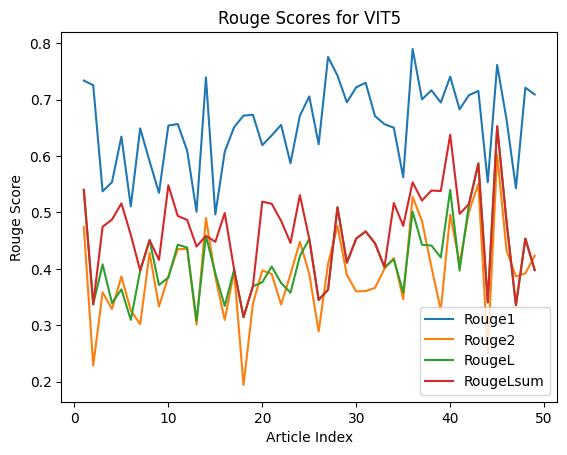

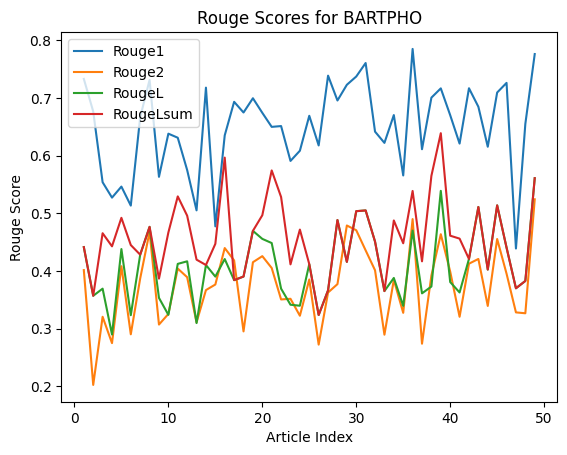

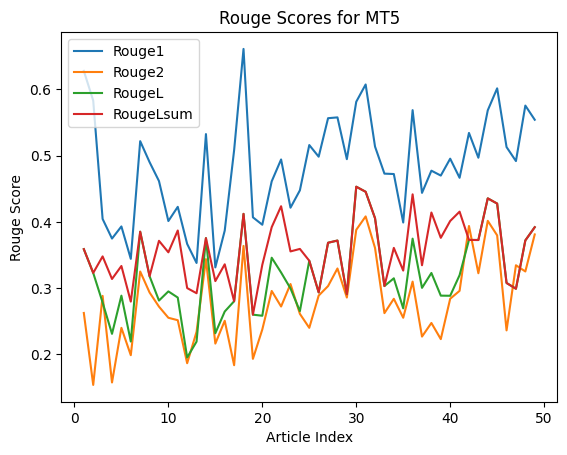

In [ ]:
rouge_scores_vit5 = calculate_rouge_scores(model_predictions_vit5)
rouge_scores_bartpho = calculate_rouge_scores(model_predictions_bartpho)
rouge_scores_mt5 = calculate_rouge_scores(model_predictions_mt5)

plot_rouge_scores(rouge_scores_vit5, 'VIT5')
plot_rouge_scores(rouge_scores_bartpho, 'BARTPHO')
plot_rouge_scores(rouge_scores_mt5, 'MT5')

In [ ]:
import numpy as np

In [ ]:
def plot_rouge_scores(rouge_scores_vit5, rouge_scores_bartpho, rouge_scores_mt5):
    rouge_labels = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum']
    models = ['VIT5', 'BARTPHO', 'MT5']
    num_models = len(models)

    for rouge_label in rouge_labels:
        rouge_vit5 = np.mean(rouge_scores_vit5[rouge_label])
        rouge_bartpho = np.mean(rouge_scores_bartpho[rouge_label])
        rouge_mt5 = np.mean(rouge_scores_mt5[rouge_label])

        plt.bar(models, [rouge_vit5, rouge_bartpho, rouge_mt5], color=['blue', 'green', 'orange'])
        plt.xlabel('Models')
        plt.ylabel('Rouge Score')
        plt.title(f'Mean Rouge Scores for {rouge_label}')
        plt.show()

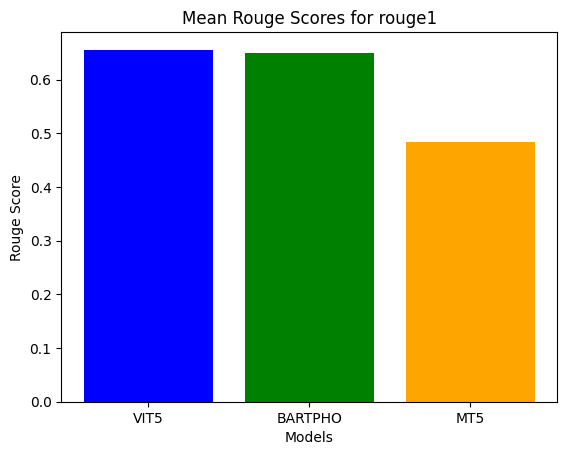

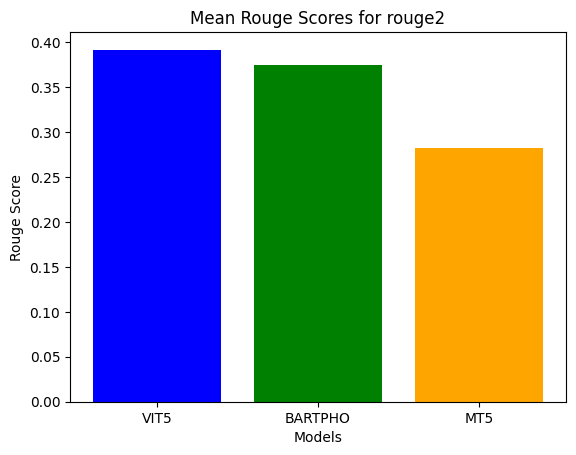

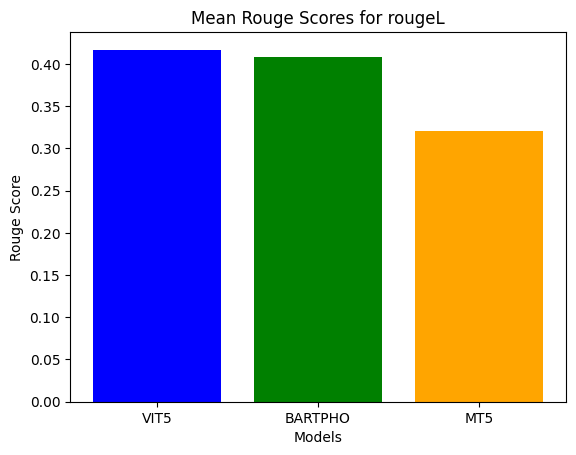

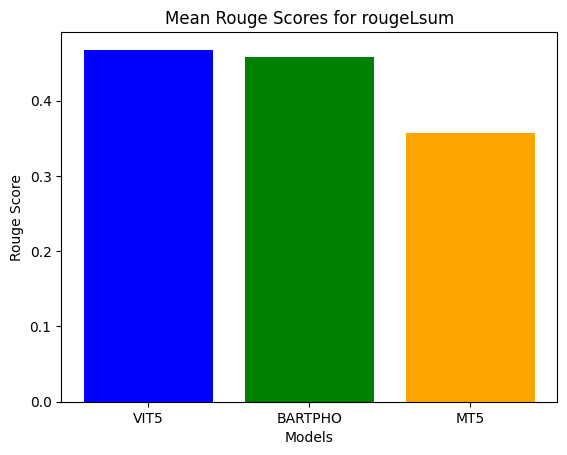

In [ ]:
plot_rouge_scores(rouge_scores_vit5, rouge_scores_bartpho, rouge_scores_mt5)

In [ ]:
import re